In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [2]:
data = pd.read_csv("../data/crabs.csv") 
data

Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
0             1  B   M      1   8.1   6.7  16.1  19.0   7.0
1             2  B   M      2   8.8   7.7  18.1  20.8   7.4
2             3  B   M      3   9.2   7.8  19.0  22.4   7.7
3             4  B   M      4   9.6   7.9  20.1  23.1   8.2
4             5  B   M      5   9.8   8.0  20.3  23.0   8.2
5             6  B   M      6  10.8   9.0  23.0  26.5   9.8
6             7  B   M      7  11.1   9.9  23.8  27.1   9.8
7             8  B   M      8  11.6   9.1  24.5  28.4  10.4
8             9  B   M      9  11.8   9.6  24.2  27.8   9.7
9            10  B   M     10  11.8  10.5  25.2  29.3  10.3
10           11  B   M     11  12.2  10.8  27.3  31.6  10.9
11           12  B   M     12  12.3  11.0  26.8  31.5  11.4
12           13  B   M     13  12.6  10.0  27.7  31.7  11.4
13           14  B   M     14  12.8  10.2  27.2  31.8  10.9
14           15  B   M     15  12.8  10.9  27.4  31.5  11.0
15           16  B   M     16  12.9  11.0  26.8  30.9  11.4
16           17  B   M     17  13.1  10.6  28.2  32.3  11.0
17           18  B   M     18  13.1  10.9  28.3  32.4  11.2
18           19  B   M     19  13.3  11.1  27.8  32.3  11.3
19           20  B   M     20  13.9  11.1  29.2  33.3  12.1
20           21  B   M     21  14.3  11.6  31.3  35.5  12.7
21           22  B   M     22  14.6  11.3  31.9  36.4  13.7
22           23  B   M     23  15.0  10.9  31.4  36.4  13.2
23           24  B   M     24  15.0  11.5  32.4  37.0  13.4
24           25  B   M     25  15.0  11.9  32.5  37.2  13.6
25           26  B   M     26  15.2  12.1  32.3  36.7  13.6
26           27  B   M     27  15.4  11.8  33.0  37.5  13.6
27           28  B   M     28  15.7  12.6  35.8  40.3  14.5
28           29  B   M     29  15.9  12.7  34.0  38.9  14.2
29           30  B   M     30  16.1  11.6  33.8  39.0  14.4
..          ... ..  ..    ...   ...   ...   ...   ...   ...
170         171  O   F     21  17.5  14.3  34.5  39.6  15.6
171         172  O   F     22  17.5  14.4  34.5  39.0  16.0
172         173  O   F     23  17.5  14.7  33.3  37.6  14.6
173         174  O   F     24  17.6  14.0  34.0  38.6  15.5
174         175  O   F     25  18.0  14.9  34.7  39.5  15.7
175         176  O   F     26  18.0  16.3  37.9  43.0  17.2
176         177  O   F     27  18.3  15.7  35.1  40.5  16.1
177         178  O   F     28  18.4  15.5  35.6  40.0  15.9
178         179  O   F     29  18.4  15.7  36.5  41.6  16.4
179         180  O   F     30  18.5  14.6  37.0  42.0  16.6
180         181  O   F     31  18.6  14.5  34.7  39.4  15.0
181         182  O   F     32  18.8  15.2  35.8  40.5  16.6
182         183  O   F     33  18.9  16.7  36.3  41.7  15.3
183         184  O   F     34  19.1  16.0  37.8  42.3  16.8
184         185  O   F     35  19.1  16.3  37.9  42.6  17.2
185         186  O   F     36  19.7  16.7  39.9  43.6  18.2
186         187  O   F     37  19.9  16.6  39.4  43.9  17.9
187         188  O   F     38  19.9  17.9  40.1  46.4  17.9
188         189  O   F     39  20.0  16.7  40.4  45.1  17.7
189         190  O   F     40  20.1  17.2  39.8  44.1  18.6
190         191  O   F     41  20.3  16.0  39.4  44.1  18.0
191         192  O   F     42  20.5  17.5  40.0  45.5  19.2
192         193  O   F     43  20.6  17.5  41.5  46.2  19.2
193         194  O   F     44  20.9  16.5  39.9  44.7  17.5
194         195  O   F     45  21.3  18.4  43.8  48.4  20.0
195         196  O   F     46  21.4  18.0  41.2  46.2  18.7
196         197  O   F     47  21.7  17.1  41.7  47.2  19.6
197         198  O   F     48  21.9  17.2  42.6  47.4  19.5
198         199  O   F     49  22.5  17.2  43.0  48.7  19.8
199         200  O   F     50  23.1  20.2  46.2  52.5  21.1

[200 rows x 9 columns]

In [3]:
x = data.iloc[:,4:9].values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA as sklearnPCA

In [7]:
pca = sklearnPCA(n_components = 2)

In [8]:
principalComponents = pca.fit_transform(x)

In [9]:
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [11]:
finaldata = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldata.head(2)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B

In [13]:
y = data.iloc[:,2].values
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F

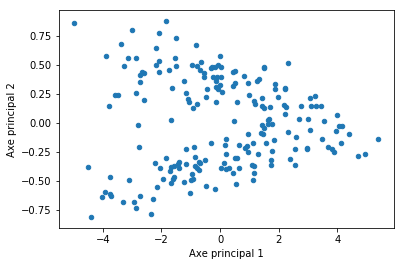

In [15]:
finaldata.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [16]:
data['CAT'] = np.where((data.sex=='F') & (data.sp =='O'), 'FO', (np.where((data.sex=='F') & (data.sp =='B'),'FB',(np.where((data.sex=='M') & (data.sp =='B'),'MB',(np.where((data.sex=='M') & (data.sp =='O'),'MO','N')))))))


In [1]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MB', 'MO', 'FB','FO']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = data['CAt'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

NameError: name 'plt' is not defined